In [7]:
## Standard libraries
import os
import math
import numpy as np 
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# Set Seaborn style
sns.set(style='darkgrid', font_scale=1.2)
from sklearn.datasets import make_moons

## Progress bar
from tqdm.notebook import tqdm

import torch
print("Using torch", torch.__version__)
#torch.manual_seed(42) # Setting the seed
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.distributions.multivariate_normal import MultivariateNormal

from torch.utils.tensorboard import SummaryWriter
import torch.profiler

Using torch 1.13.1


In [8]:
class langevin_sampler():
    def __init__(self, sampling_steps, variance, device):
        self.device = device
        self.K = torch.tensor(sampling_steps, device=self.device)
        self.s = torch.tensor(variance, device=self.device)
    
    def get_sample(self, initial_sample, grad_log_fcn):
        x_k = initial_sample
        sample = torch.zeros(self.K, device=self.device)
        step=0
        while step < self.K:
            # Compute gradient
            grad = grad_log_fcn.get(x_k)
            
            # Update sample
            x_k = x_k + self.s * grad + (torch.sqrt(2*self.s)*torch.randn(1, device=self.device))  
            sample[step] = x_k.item()
            step += 1             
        
        return x_k.item(), sample.numpy()

In [9]:
class grad_log_standard_normal():
    def __init__(self):
        pass

    def get(self, x):
        return -x

  0%|          | 0/1000 [00:00<?, ?it/s]

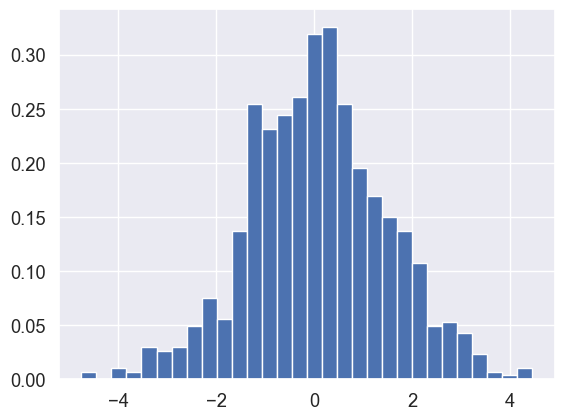

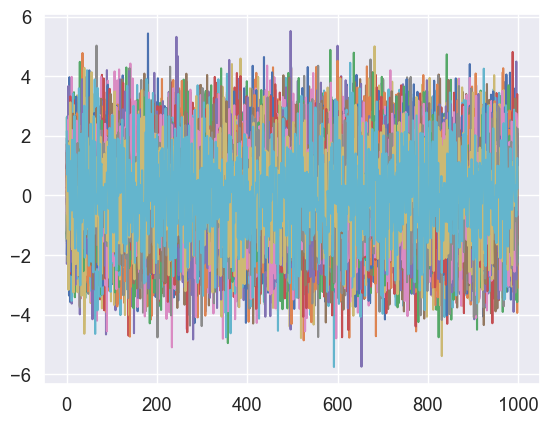

In [10]:
device = torch.device('cpu')
sampler = langevin_sampler(40, 1, device)
grad_log_fcn = grad_log_standard_normal()

initial_sample = torch.randn(1, device=device)
x, samples = list(zip(*[sampler.get_sample(initial_sample, grad_log_fcn) for _ in tqdm(range(1000))]))


plt.hist(x, bins=30, density=True)
plt.show()

plt.plot(samples)
plt.show()

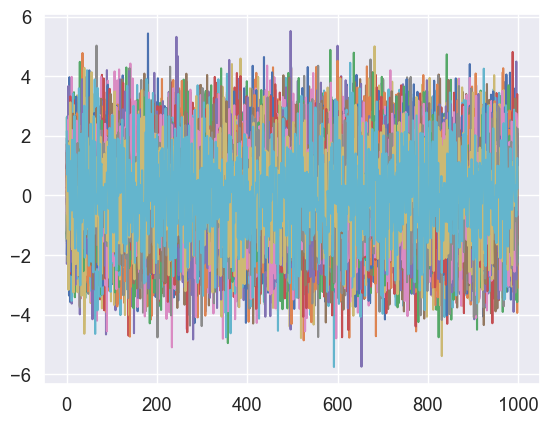

In [11]:
plt.plot([v[:50] for v in samples])
plt.show()

In [12]:
print([v[-5:] for v in samples[:10]])


[array([ 1.4409057 , -0.6148827 ,  0.81436956,  0.87570393,  2.1564093 ],
      dtype=float32), array([-0.9161919 ,  0.3590336 ,  0.7968115 , -0.8087445 ,  0.70140296],
      dtype=float32), array([-0.4307607,  1.0598578,  1.8330283, -1.4725446,  1.0962852],
      dtype=float32), array([ 0.25590363, -1.2760559 , -0.23280387, -1.1410363 ,  0.1411406 ],
      dtype=float32), array([-2.7763195,  2.2128298,  0.4562693, -3.1671393,  1.6700957],
      dtype=float32), array([-0.77634853,  2.6616797 , -1.6655812 , -0.7498065 ,  0.5841741 ],
      dtype=float32), array([ 0.610421  , -0.61711586, -0.0143483 ,  1.7746133 ,  1.1696631 ],
      dtype=float32), array([-0.6116297 , -0.7237848 ,  0.28935984,  0.4368951 , -1.1559058 ],
      dtype=float32), array([-1.4325898 ,  1.34496   ,  0.48648703,  3.1230602 , -0.15130134],
      dtype=float32), array([-1.2700518 ,  0.743736  , -1.724805  , -0.07383167, -0.48210603],
      dtype=float32)]
